# Problem Statement
The goal is to segment customers into distinct groups based on their purchasing behavior. This allows for targeted marketing, personalized offers, and improved customer retention strategies.

# Dataset Overview:
The dataset contains transactional data from a retail store, and the key features are:

- Customer ID: A unique identifier for each customer.
- Annual Income (k$): Annual income of the customer in thousands.
- Spending Score (1-100): A score assigned by the store based on customer behavior and spending patterns.
- Age: The age of the customer.
- Gender: The gender of the customer.

The task is to group customers based on their behavior (spending score and income), and possibly their demographic information (age, gender).

# Steps to be Covered

### 1. Understanding the Problem:
- Discuss how customer segmentation can help businesses better understand their customer base, target them with personalized offers, and improve retention.

### 2. Dataset Preprocessing:
- **Load the dataset**: Import and load the dataset.
- **Check for missing values**: Handle any missing or erroneous data points.
- **Standardize/Normalize the data**: Since the dataset contains features on different scales (income, spending score), normalize the data for clustering.
- **Data exploration**: Generate visualizations to explore the relationship between features (e.g., income vs. spending score).

### 3. Choosing a Clustering Algorithm:
- **K-Means Clustering**: Use K-Means to group customers based on their income and spending score.
- **Optional DBSCAN Clustering**: Introduce DBSCAN for more flexible clustering (e.g., when there are non-spherical clusters).

### 4. Feature Engineering:
- **PCA (optional)**: If you want to reduce dimensionality, discuss Principal Component Analysis (PCA) for feature reduction.
- **Scaling features**: Apply feature scaling to ensure each feature is on the same scale.

### 5. Modeling and Training:
- **K-Means Model**: Train a K-Means model to cluster customers based on their income and spending score.
- **DBSCAN Model (optional)**: Run DBSCAN on the dataset to explore different clustering results.

### 6. Evaluating Clustering Results:
- Use **Elbow Method** to determine the optimal number of clusters for K-Means.
- **Silhouette Score**: Assess the quality of the clusters formed.
- Visualize the clusters formed and explain how to interpret them.

### 7. Post-Processing:
- Assign cluster labels to customers.
- Analyze customer groups (e.g., high income vs. low income, high spenders vs. low spenders) and provide business insights.

### 8. Deployment Suggestions:
- Discuss how these customer segments could be used by the marketing team to tailor campaigns.
- Suggest integrating the customer segmentation model into the company’s CRM or marketing automation system for personalized offers.


# Import Libraries and Load Dataset

In [3]:
# Import required libraries
import pandas as pd

# Load the dataset
file_path = 'mall_customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preparation & Preprocessing

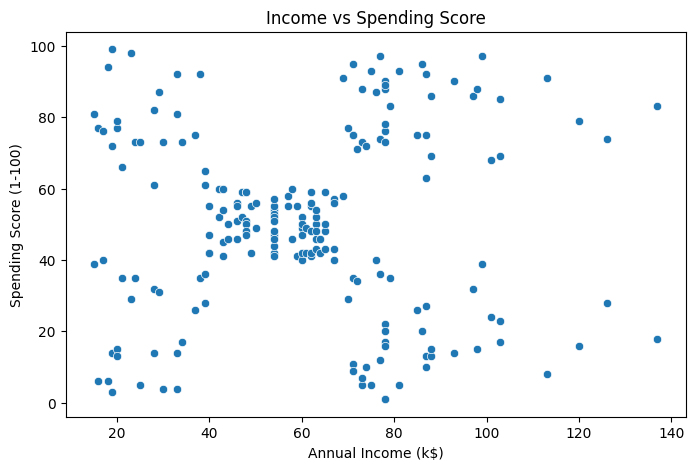

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Check for missing values
df.isnull().sum()

# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X contains the selected columns from the dataset (Annual Income and Spending Score).
# X_scaled is the normalized version of X, where the values are scaled to have a mean of 0 and a standard deviation of 1, making the data suitable for clustering algorithms.

# Plot data to explore (Income vs Spending Score)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()


# Model Training (K-Means)

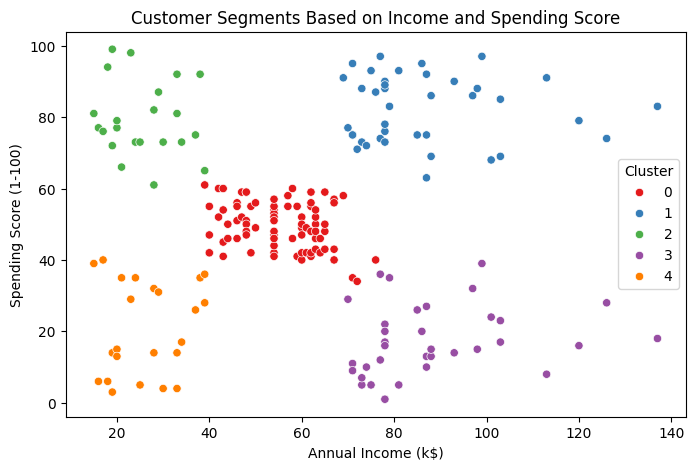

In [11]:

from sklearn.cluster import KMeans

# Apply K-Means clustering with a predefined number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to data
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Income and Spending Score')
plt.show()


# Metrics Evaluation & Explanation

Silhouette Score for K-Means Clustering: 0.5546571631111091


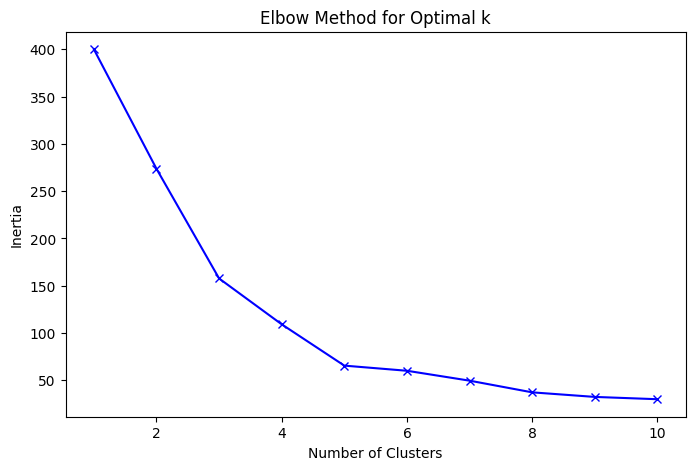

In [9]:
from sklearn.metrics import silhouette_score

# Compute silhouette score to evaluate clustering quality
score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for K-Means Clustering: {score}')

# Elbow method to determine optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Elbow Method Graph:
- The **Elbow Method** helps to determine the optimal number of clusters (k) in K-Means clustering. 
- In the graph, the **x-axis** represents the number of clusters (k), and the **y-axis** represents the **Inertia**, which is the sum of squared distances between data points and their nearest cluster center.
- As the number of clusters increases, the inertia decreases, meaning the clusters are becoming tighter. However, after a certain point (around **k=5**), the decrease in inertia slows down significantly, forming an "elbow" shape.
- The "elbow" at **k=5** suggests that 5 clusters might be the optimal choice, as adding more clusters beyond this point does not significantly improve the model.

### Silhouette Score:
- The **Silhouette Score** measures how well samples are clustered, with values ranging from -1 to 1.
- A higher score indicates that data points are well matched to their own cluster and poorly matched to neighboring clusters.
- In this case, a **Silhouette Score of 0.55** is decent, meaning the clusters are reasonably well-separated. Scores above 0.5 typically indicate good clustering.


# Model Saving

In [12]:
import pickle

# Save the trained K-Means model
with open('kmeans_customer_segmentation.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save the scaled data (for use during future predictions)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


# Load and Predict using the Saved Model

In [17]:
# Future Predictions
import numpy as np

# Load the saved model and scaler
with open('kmeans_customer_segmentation.pkl', 'rb') as f:
    saved_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    saved_scaler = pickle.load(f)

# Assume a new customer with income = 60k$ and spending score = 50
new_customer = pd.DataFrame([[60, 50]], columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Scale the new customer data
new_customer_scaled = saved_scaler.transform(new_customer)

# Predict which cluster this new customer belongs to
predicted_cluster = saved_model.predict(new_customer_scaled)
print(f'The new customer belongs to Cluster: {predicted_cluster[0]}')


The new customer belongs to Cluster: 0
